In [340]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE, Isomap

### Part A: Preprocessing and Initial Setup

1. Data Loading

In [284]:
data, meta = arff.loadarff('./yeast/yeast.arff')
df = pd.DataFrame(data)   

In [285]:
df

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Class5,Class6,Class7,Class8,Class9,Class10,Class11,Class12,Class13,Class14
0,0.004168,-0.170975,-0.156748,-0.142151,0.058781,0.026851,0.197719,0.041850,0.066938,-0.056617,...,b'0',b'0',b'1',b'1',b'0',b'0',b'0',b'1',b'1',b'0'
1,-0.103956,0.011879,-0.098986,-0.054501,-0.007970,0.049113,-0.030580,-0.077933,-0.080529,-0.016267,...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
2,0.509949,0.401709,0.293799,0.087714,0.011686,-0.006411,-0.006255,0.013646,-0.040666,-0.024447,...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'1',b'0'
3,0.119092,0.004412,-0.002262,0.072254,0.044512,-0.051467,0.074686,-0.007670,0.079438,0.062184,...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
4,0.042037,0.007054,-0.069483,0.081015,-0.048207,0.089446,-0.004947,0.064456,-0.133387,0.068878,...,b'1',b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2412,-0.119784,0.001259,-0.123645,-0.015513,-0.059683,0.091032,-0.043302,0.229219,-0.071498,0.182709,...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
2413,0.085327,0.058590,0.085268,-0.020897,0.068972,0.030125,0.078056,0.011346,0.052618,0.066093,...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'1',b'0'
2414,0.082526,-0.095571,-0.022019,-0.046793,-0.038360,0.041084,0.056509,0.011749,-0.029657,-0.012198,...,b'0',b'1',b'1',b'1',b'0',b'0',b'0',b'1',b'1',b'0'
2415,-0.130830,0.008868,-0.009457,-0.058930,-0.041224,0.042269,0.117717,0.037388,-0.085563,0.136649,...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'1',b'0'


In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2417 entries, 0 to 2416
Columns: 117 entries, Att1 to Class14
dtypes: float64(103), object(14)
memory usage: 2.2+ MB


In [287]:
df.describe()

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att94,Att95,Att96,Att97,Att98,Att99,Att100,Att101,Att102,Att103
count,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,...,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000
mean,0.001173,-0.000436,-0.000257,0.000265,0.001228,0.000475,0.001107,0.000420,0.001076,-0.000009,...,-0.000773,0.000464,-0.000515,0.000667,0.000324,-0.001483,-0.001047,-0.001539,0.000284,0.007605
std,0.097411,0.097885,0.097746,0.096969,0.096909,0.097306,0.097170,0.096803,0.096326,0.096805,...,0.093316,0.096684,0.096209,0.096635,0.096280,0.094369,0.096900,0.094211,0.093154,0.099368
min,-0.371146,-0.472632,-0.339195,-0.467945,-0.367044,-0.509447,-0.319928,-0.594498,-0.369712,-0.767128,...,-0.455191,-0.283594,-0.279408,-0.226420,-0.225374,-0.501572,-0.236589,-0.267052,-0.194079,-0.237752
25%,-0.053655,-0.058734,-0.057526,-0.057149,-0.058461,-0.060212,-0.058445,-0.062849,-0.063472,-0.065010,...,-0.054133,-0.056415,-0.056414,-0.059382,-0.058025,-0.053591,-0.063318,-0.059542,-0.054078,-0.077191
50%,0.003649,-0.003513,0.002892,-0.000153,0.005565,0.000321,0.006179,0.001436,0.003515,0.002432,...,-0.012893,-0.023595,-0.024313,-0.023059,-0.021942,-0.018216,-0.033623,-0.023519,-0.012007,0.022126
75%,0.057299,0.048047,0.061007,0.054522,0.066286,0.059908,0.068892,0.061418,0.064958,0.063096,...,0.027977,0.034937,0.036057,0.041430,0.035730,0.019583,0.038901,0.025408,0.028087,0.103185
max,0.520272,0.614114,0.353241,0.568960,0.307649,0.336971,0.351401,0.454591,0.419852,0.420876,...,0.609175,0.542867,0.547134,0.385928,0.540493,0.569250,0.509963,0.587358,0.700340,0.163431


In [288]:
print(df.columns)

Index(['Att1', 'Att2', 'Att3', 'Att4', 'Att5', 'Att6', 'Att7', 'Att8', 'Att9',
       'Att10',
       ...
       'Class5', 'Class6', 'Class7', 'Class8', 'Class9', 'Class10', 'Class11',
       'Class12', 'Class13', 'Class14'],
      dtype='object', length=117)


In [289]:
X = df.drop(columns = ["Class" + str(i) for i in range(1,15)])

In [290]:
X

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att94,Att95,Att96,Att97,Att98,Att99,Att100,Att101,Att102,Att103
0,0.004168,-0.170975,-0.156748,-0.142151,0.058781,0.026851,0.197719,0.041850,0.066938,-0.056617,...,0.006166,-0.012976,-0.014259,-0.015024,-0.010747,0.000411,-0.032056,-0.018312,0.030126,0.124722
1,-0.103956,0.011879,-0.098986,-0.054501,-0.007970,0.049113,-0.030580,-0.077933,-0.080529,-0.016267,...,0.007680,0.027719,-0.085811,0.111123,0.050541,0.027565,-0.063569,-0.041471,-0.079758,0.017161
2,0.509949,0.401709,0.293799,0.087714,0.011686,-0.006411,-0.006255,0.013646,-0.040666,-0.024447,...,0.096277,-0.044932,-0.089470,-0.009162,-0.012010,0.308378,-0.028053,0.026710,-0.066565,-0.122352
3,0.119092,0.004412,-0.002262,0.072254,0.044512,-0.051467,0.074686,-0.007670,0.079438,0.062184,...,-0.083809,0.200354,-0.075716,0.196605,0.152758,-0.028484,-0.074207,-0.089227,-0.049913,-0.043893
4,0.042037,0.007054,-0.069483,0.081015,-0.048207,0.089446,-0.004947,0.064456,-0.133387,0.068878,...,-0.060467,0.044351,-0.057209,0.028047,0.029661,-0.050026,0.023248,-0.061539,-0.035160,0.067834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2412,-0.119784,0.001259,-0.123645,-0.015513,-0.059683,0.091032,-0.043302,0.229219,-0.071498,0.182709,...,0.024084,-0.055915,-0.055593,-0.049642,0.018571,0.068742,-0.061001,-0.081132,-0.065844,0.001267
2413,0.085327,0.058590,0.085268,-0.020897,0.068972,0.030125,0.078056,0.011346,0.052618,0.066093,...,-0.079992,-0.075444,0.294987,-0.076379,-0.076293,-0.072451,-0.052258,-0.040026,0.342176,-0.169668
2414,0.082526,-0.095571,-0.022019,-0.046793,-0.038360,0.041084,0.056509,0.011749,-0.029657,-0.012198,...,-0.006624,-0.036850,-0.064831,-0.068696,-0.068521,-0.039841,0.274575,-0.066957,0.260121,-0.125303
2415,-0.130830,0.008868,-0.009457,-0.058930,-0.041224,0.042269,0.117717,0.037388,-0.085563,0.136649,...,0.085087,0.033166,-0.012710,0.135359,0.213512,-0.107561,-0.081925,-0.122332,-0.022453,0.001953


In [291]:
Y = df[["Class" + str(i) for i in range(1,15)]]

In [292]:
Y

,Class1,Class2,Class3,Class4,Class5,Class6,Class7,Class8,Class9,Class10,Class11,Class12,Class13,Class14
0,b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'1',b'0',b'0',b'0',b'1',b'1',b'0'
1,b'0',b'0',b'1',b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
2,b'0',b'1',b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'1',b'0'
3,b'0',b'0',b'1',b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
4,b'0',b'0',b'1',b'1',b'1',b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2412,b'0',b'1',b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
2413,b'1',b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'1',b'0'
2414,b'0',b'0',b'0',b'0',b'0',b'1',b'1',b'1',b'0',b'0',b'0',b'1',b'1',b'0'
2415,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'1',b'0'


2. Dimensionality Check

In [293]:
print(f"The number of data points: {len(X)}")
print(f"The number of features: {X.shape[1]}")

The number of data points: 2417
The number of features: 103


3. Label Selection for Visualisation

In [294]:
Y

,Class1,Class2,Class3,Class4,Class5,Class6,Class7,Class8,Class9,Class10,Class11,Class12,Class13,Class14
0,b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'1',b'0',b'0',b'0',b'1',b'1',b'0'
1,b'0',b'0',b'1',b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
2,b'0',b'1',b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'1',b'0'
3,b'0',b'0',b'1',b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
4,b'0',b'0',b'1',b'1',b'1',b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2412,b'0',b'1',b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
2413,b'1',b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'1',b'0'
2414,b'0',b'0',b'0',b'0',b'0',b'1',b'1',b'1',b'0',b'0',b'0',b'1',b'1',b'0'
2415,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'1',b'0'


In [ ]:
classes = [f"Class{i}" for i in range(1, 15)]

Y = Y.copy()
for col in classes:
    Y.loc[:, col] = Y[col].astype(str).str.extract(r'(\d+)')[0].astype(int)


In [296]:
Y

,Class1,Class2,Class3,Class4,Class5,Class6,Class7,Class8,Class9,Class10,Class11,Class12,Class13,Class14
0,0,0,0,0,0,0,1,1,0,0,0,1,1,0
1,0,0,1,1,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,0,1,1,0
3,0,0,1,1,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2412,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2413,1,1,0,0,0,0,0,0,0,0,0,1,1,0
2414,0,0,0,0,0,1,1,1,0,0,0,1,1,0
2415,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [297]:
all_labels = []
for i in range(len(Y)):
    row  = Y.iloc[i]
    label_row = [cls for cls in classes if row[cls] == 1]
    all_labels.append(label_row)

In [298]:
all_labels

[['Class7', 'Class8', 'Class12', 'Class13'],
 ['Class3', 'Class4'],
 ['Class2', 'Class3', 'Class12', 'Class13'],
 ['Class3', 'Class4'],
 ['Class3', 'Class4', 'Class5', 'Class6'],
 ['Class10', 'Class11', 'Class12', 'Class13'],
 ['Class1', 'Class12', 'Class13'],
 ['Class1', 'Class3', 'Class4', 'Class12', 'Class13'],
 ['Class1', 'Class2', 'Class12', 'Class13'],
 ['Class3', 'Class4', 'Class12', 'Class13'],
 ['Class5', 'Class6', 'Class7', 'Class8'],
 ['Class10', 'Class11', 'Class12', 'Class13'],
 ['Class2', 'Class3'],
 ['Class4', 'Class5', 'Class12', 'Class13'],
 ['Class8', 'Class9'],
 ['Class1', 'Class3', 'Class4', 'Class10', 'Class11', 'Class12', 'Class13'],
 ['Class5', 'Class6', 'Class12', 'Class13'],
 ['Class1', 'Class2', 'Class12', 'Class13'],
 ['Class4', 'Class5', 'Class12', 'Class13'],
 ['Class3', 'Class4', 'Class12', 'Class13'],
 ['Class3', 'Class4', 'Class12', 'Class13'],
 ['Class1', 'Class2', 'Class12', 'Class13'],
 ['Class5', 'Class6', 'Class7', 'Class8'],
 ['Class5', 'Class6', '

In [299]:
label_count_dict = {}
for label_comb in all_labels:
    for label in label_comb:
        if label not in label_count_dict:
            label_count_dict[label] = 1
        else:
            label_count_dict[label] += 1

In [300]:
label_count_dict

{'Class7': 428,
 'Class8': 480,
 'Class12': 1816,
 'Class13': 1799,
 'Class3': 983,
 'Class4': 862,
 'Class2': 1038,
 'Class5': 722,
 'Class6': 597,
 'Class10': 253,
 'Class11': 289,
 'Class1': 762,
 'Class9': 178,
 'Class14': 34}

-  The most frequent class is Class12 while the second most frequent class is Class13.

In [301]:
label_comb_dict = {}
for label_comb in all_labels:
    clsstr = ""
    for cls in label_comb:
        clsstr += cls
    if clsstr not in label_comb_dict:
        label_comb_dict[clsstr] = 1
    else:
        label_comb_dict[clsstr] += 1

In [302]:
label_comb_dict

{'Class7Class8Class12Class13': 75,
 'Class3Class4': 53,
 'Class2Class3Class12Class13': 117,
 'Class3Class4Class5Class6': 8,
 'Class10Class11Class12Class13': 34,
 'Class1Class12Class13': 59,
 'Class1Class3Class4Class12Class13': 15,
 'Class1Class2Class12Class13': 172,
 'Class3Class4Class12Class13': 237,
 'Class5Class6Class7Class8': 11,
 'Class2Class3': 68,
 'Class4Class5Class12Class13': 233,
 'Class8Class9': 25,
 'Class1Class3Class4Class10Class11Class12Class13': 1,
 'Class5Class6Class12Class13': 105,
 'Class5Class6Class7Class8Class11Class12Class13': 7,
 'Class2Class3Class5Class6Class12Class13': 15,
 'Class2Class3Class9Class10Class12Class13': 11,
 'Class1Class2Class6Class7Class8Class12Class13': 31,
 'Class5Class6Class7Class8Class12Class13': 60,
 'Class1Class2Class5Class6': 16,
 'Class1Class6Class7': 5,
 'Class1Class2Class3Class4Class12Class13': 57,
 'Class1Class2': 131,
 'Class2Class3Class5Class6Class10Class11Class12Class13': 9,
 'Class2Class3Class7Class8Class12Class13': 24,
 'Class6Class

In [411]:
s = 0
for comb in label_comb_dict.keys():
    if "Class12" in comb and "Class13" in comb:
        s += label_comb_dict[comb]
print(s)

1799


- We see that Class12 and Class13 occur together 1799 times i.e., whenever Class13 occurs, Class12 also occurs.

In [304]:
max_comb_freq = max(label_comb_dict.values())
print(max_comb_freq)

237


- The multi-label combination that is most frequent has a frequency of 237.

In [305]:
for k,v in label_comb_dict.items():
    if v == max_comb_freq:
        max_class_comb = k
print(max_class_comb)

Class3Class4Class12Class13


- The most frequent multi-label combination is Class3Class4Class12Class13.

In [412]:
s = 0
for comb in label_comb_dict.keys():
    if "Class2" in comb and "Class5" in comb:
        s += label_comb_dict[comb]
print(s)

154


-  Since Class12 always occurs with Class13, it is not possible to have two distinct categories where one is "Class12" and the other is "Class13". 
- To get the best possible distinct labelling method, it would be best to get two classes that are frequent, but are disjoint (do not occur together) to an appreciable extent.
- For this, we have chosen Class2 and Class5, which are frequent but not as frequent as Class12 and Class13. We see that these two classes only occur together 154 times, which is much less compared to their actual frequencies (1038 and 722).

In [376]:
modified_labels = []
for label in all_labels:
    cls2 = False
    cls5 = False
    if "Class2" in label:
        cls2 = True
    if "Class5" in label:
        cls5 = True
    clsstr = ''
    for cls in label:
        clsstr += cls
    if clsstr == max_class_comb:
        modified_labels.append(max_class_comb)
        
    elif cls5 and cls2:
        modified_labels.append("Class5")
    elif cls5:
        modified_labels.append("Class5")
    elif cls2:
        modified_labels.append("Class2")
    else:
        modified_labels.append("Other")

In [377]:
modified_labels

['Other',
 'Other',
 'Class2',
 'Other',
 'Class5',
 'Other',
 'Other',
 'Other',
 'Class2',
 'Class3Class4Class12Class13',
 'Class5',
 'Other',
 'Class2',
 'Class5',
 'Other',
 'Other',
 'Class5',
 'Class2',
 'Class5',
 'Class3Class4Class12Class13',
 'Class3Class4Class12Class13',
 'Class2',
 'Class5',
 'Class5',
 'Class5',
 'Class2',
 'Class2',
 'Class5',
 'Class5',
 'Other',
 'Class5',
 'Other',
 'Class2',
 'Class2',
 'Class5',
 'Class3Class4Class12Class13',
 'Class2',
 'Class2',
 'Other',
 'Class5',
 'Class2',
 'Class2',
 'Class2',
 'Class5',
 'Class5',
 'Class5',
 'Class5',
 'Class5',
 'Class2',
 'Class2',
 'Other',
 'Class5',
 'Class2',
 'Class3Class4Class12Class13',
 'Other',
 'Other',
 'Other',
 'Class2',
 'Class2',
 'Class5',
 'Class2',
 'Class2',
 'Other',
 'Class5',
 'Class5',
 'Class2',
 'Other',
 'Class2',
 'Class5',
 'Class2',
 'Other',
 'Other',
 'Class2',
 'Class5',
 'Class2',
 'Class2',
 'Class2',
 'Class5',
 'Class3Class4Class12Class13',
 'Class2',
 'Class5',
 'Class5'

In [381]:
Y["Modified_labels"] = modified_labels

In [382]:
Y

,Class1,Class2,Class3,Class4,Class5,Class6,Class7,Class8,Class9,Class10,Class11,Class12,Class13,Class14,Modified_labels
0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,Other
1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,Other
2,0,1,1,0,0,0,0,0,0,0,0,1,1,0,Class2
3,0,0,1,1,0,0,0,0,0,0,0,0,0,0,Other
4,0,0,1,1,1,1,0,0,0,0,0,0,0,0,Class5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2412,0,1,1,0,0,0,0,0,0,0,0,0,0,0,Class2
2413,1,1,0,0,0,0,0,0,0,0,0,1,1,0,Class2
2414,0,0,0,0,0,1,1,1,0,0,0,1,1,0,Other
2415,0,0,0,0,0,0,0,0,0,0,0,1,1,0,Other


In [383]:
Y["Modified_labels"].value_counts()

Modified_labels
Class2                        884
Class5                        722
Other                         574
Class3Class4Class12Class13    237
Name: count, dtype: int64

4. Scaling

- Distance-based dimensionality reduction techniques rely on the distance between data points in the feature space.
- If features have different scales of values, then the distances get dominated by those features that are large in magnitude.
- This would distort the results, and would cause the algorithm (PCA, t-SNE, etc) to favour those features that have a large numerical range, ignoring those that are much smaller, even if they carry important information.
- By scaling the features, it ensures that all the features are in the same numerical range (zero mean and standard deviation 1), and hence, they have equal contribution to the distance calculation.

In [311]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Part B: t-SNE and Veracity Inspection

1. t-SNE implementation

In [384]:
def tsne2D(X,perp):
    tsne = TSNE(
        n_components=2,   
        perplexity=perp,    
        random_state=42,
    )
    X_reduced = tsne.fit_transform(X)
    return X_reduced

In [387]:
def plot_tsne(X,perp):
    X_tsne = tsne2D(X,perp)
    for cls in ["Class2","Class5","Class3Class4Class12Class13","Other"]:
        idx = np.argwhere(Y["Modified_labels"] == cls).reshape(-1,)
        X_idx = X_tsne[idx]
        plt.scatter(X_idx[:, 0], X_idx[:, 1],label=cls)
    plt.xlabel('TSNE 1')
    plt.ylabel('TSNE 2')
    plt.title(f't-SNE 2D with perplexity = {perp}')
    plt.legend()
    plt.show()

2. Data Visualisation

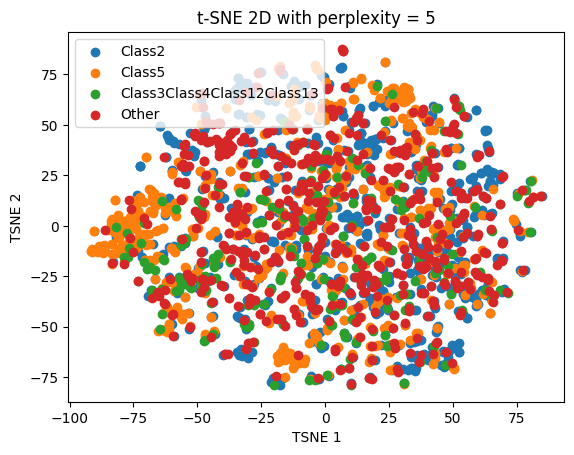

In [388]:
plot_tsne(X,5)

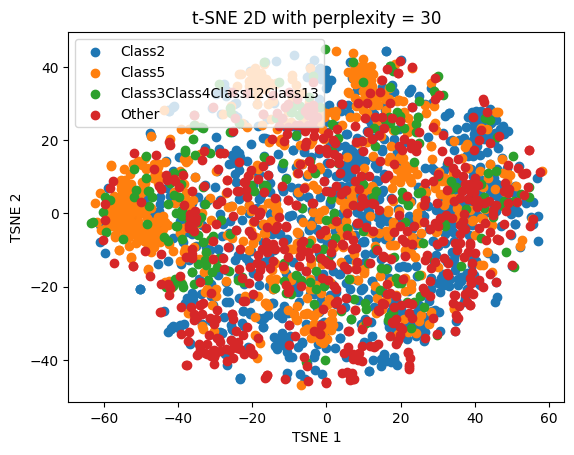

In [389]:
plot_tsne(X,30)

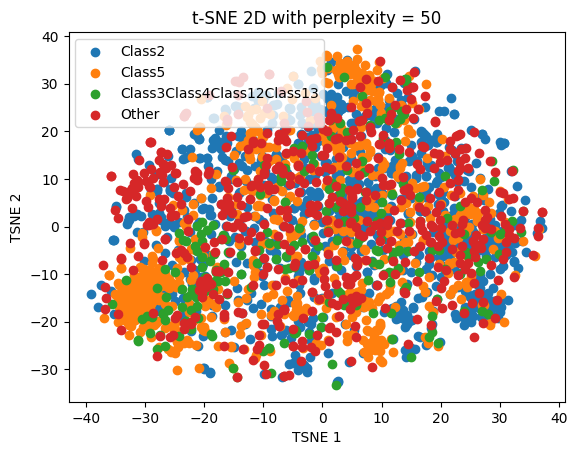

In [390]:
plot_tsne(X,50)

- From the three choices of perplexity, the choice of a value of 30 seems the best as it strikes a balance between revealing local regions/neighbourhoods, while at the same time preserving the global structure and not oversmoothening the data distribution.
- When a value of 5 is used, the manifold seems too noisy, with a few small clusters appearing. There is no observable global structure to the manifold.
- When a value of 50 is used, more distinct and larger clusters are observed and a more identifiable global structure is visible. However, there seems to be a bit of oversmoothening in terms of small distinct clusters being absorbed into larger ones.

3. Veracity Inspection

- Observing the t-SNE plot with perplexity = 30,
1. Noisy/Ambiguous labels:
    - There are several regions where noisy data points exist. One case is in the large Class5 cluster (Orange) on the leftmost side, where a few instances of "Other" and "Class3Class4Class12Class13" are embedded in this cluster.
    - Another instance is in the top right (x = 40,y = 20) cluster of Class2, where a few instances of all the other classes are present.
    - Overall, a majority of the clusters that exist contain noisy samples belonging to other classes. 
2. Outliers:
    - Near (x = 0,y = -40), we can see an isolated sample from both the Class5 (Orange) and Class3Class4Class12Class13 (Green) group. A reasonable amount of points from the Green group seem to appear in tiny clusters that are scattered quite far apart.
    - These outliers can be interpreted in various ways. They can either be a rare instance of certain gene types that is largely different from their original class or they could be due to some sort of noise, due to which the recorded label/class for it is quite different from its actual class.
3. Hard to Learn Samples:
    - If we look at the central region of the t-SNE plot (x = 0, y = 0), there is an equal mix of samples from each class, and there seems to be no underlying structure/dominant cluster in that zone.
    - These samples can be categorised as hard to learn, because they follow no specific local structure and share features very similar to samples from other classes that are nearby. A classifier would struggle to classify or learn these samples due to their ambiguous structure. 

### Part C: Isomap and Manifold Learning

1. Isomap Implementation

Isomap:
1. Preserves global structure.
2. It computes the shortest paths along the data manifold between all points, then tries to preserve those distances in the low-dimensional embedding.
3. This means Isomap captures the overall shape of the manifold, not just local neighborhoods.

t-SNE:
1. Preserves local structure.
2. It converts high-dimensional pairwise distances into probability distributions, then tries to minimize the difference between high- and low-dimensional distributions.
3. t-SNE makes sure that neighbors stay neighbors, but it doesn’t care much about distances between clusters (global layout can be misleading).

In [407]:
isomap = Isomap(n_components=2, n_neighbors=15)

In [408]:
X_isomap = isomap.fit_transform(X)

In [409]:
X_isomap

array([[ 10.79570776,  -7.39537648],
       [-11.25502365,  -0.83616145],
       [-12.77062878,  -5.58588057],
       ...,
       [ -1.83989112,   4.25659233],
       [ -8.44568292,   5.25803496],
       [ -3.01416892,  -6.01869281]])

2. Visualisation

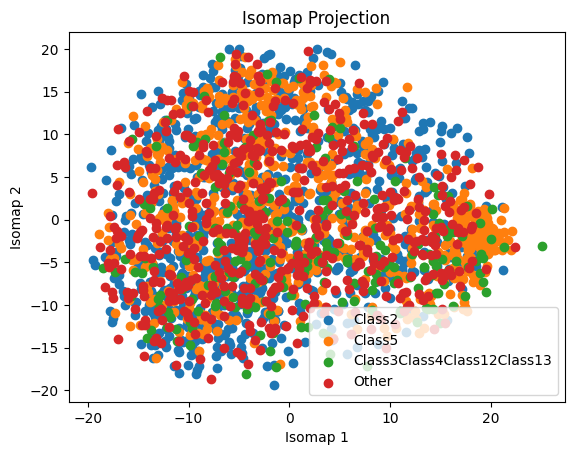

In [410]:
for cls in ["Class2","Class5","Class3Class4Class12Class13","Other"]:
    idx = np.argwhere(Y["Modified_labels"] == cls).reshape(-1,)
    X_idx = X_isomap[idx]
    plt.scatter(X_idx[:, 0], X_idx[:, 1],label=cls)
plt.xlabel('Isomap 1')
plt.ylabel('Isomap 2')
plt.title("Isomap Projection")
plt.legend()
plt.show()

3. Comparison and Curvature:


- We see that in the t-SNE plot, there is more visible grouping/clustering among samples of the same class. This indicates that data points that were close/neighbours in the high dimensional feature space are neighbours in the low dimensional 2D space too. Hence it preserves local structure well.
- However, t-SNE has distorted the global structure. This is evident from the fact that certain clusters are far apart from each other. This does not necessarily translate to the same distance in the higher dimensional space for these samples. Hence, t-SNE does not preserve global structure very well.
- In the Isomap plot, the embedding looks more continuous, without any exaggerated grouping of clusters as seen in the t-SNE plot.
- Classes seem to overlap more, but the continuous structure of the embedding indidcates that this is a better representation of the manifold. This makes sense since Isomap tries to preserve the distances between points across the whole dataset while moving from the high dimensional space to a lower dimensional space.
- Thus, when it comes to preserving global structure, Isomap does a better job. 


- In high-dimensional data, points often don’t fill the whole space. Instead, they lie on a much lower-dimensional, curved surface embedded in that space. This surface is called a manifold.
- In the Isomap projection, the embedding looks fairly round and compact, without extreme twists or folds. This suggests the underlying manifold here is not highly curved or topologically complex.
- If the manifold were very curved, Isomap would need to stretch and warp more, leading to uneven spacing or distorted clusters in 2D.
- If the manifold is simple (flat, low curvature, etc.), classes are easier to separate, because a linear or smooth boundary can often distinguish them.
- If the manifold is complex (curved, twisted, high-dimensional, etc.), separating classes may require a highly nonlinear boundary.